## 1. 인공지능과 가위바위보 하기

**1-1. 인공지능과 가위바위보 하기**

**1) 간단한 이미지 분류기**

- 숫자는 0~9까지 총 10개의 클래스(class)만 인식*   
- 가위바위보는 총 3개의 클래스(class) 인식*   
- 클래스(class)가 몇개 안되는 경우, 인공지능은 간단하게 이미지를 분류 가능*

**2)숫자 손글씨 인식기 만들기(Sequential Model을 이용하는 방법)**

- 숫자 손글씨 분류기는 손으로 쓴 숫자 이미지를 입력
- 그 이미지가 어떤 숫자인지 출력 가능

**3)어떻게 만들지?**

- 일반적으로 딥러닝 기술 프로세스
- 데이터 준비 -> 딥러닝 네트워크 설계 -> 학습 -> 테스트(평가)

----

**1-2. 데이터를 준비하자!**

__1) MINIST 숫자 손글씨 Dataset 불러들이기__

In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt 
#파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart), 
#플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공합니다.

In [8]:
print(tf.__version__) # Tensorflow의 버전을 출력

2.2.0


In [9]:
mnist = keras.datasets.mnist

__2) 학습용 데이터와 시험용 데이터__

In [10]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() # mnist.load() 함수를 통해 학습용 데이터와 시험용 데이터를 나누어서 받아드림.

In [11]:
print(len(x_train))  #x_train 배열의 크기 출력

60000


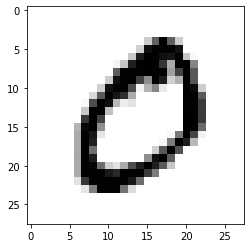

In [12]:
plt.imshow(x_train[1],cmap=plt.cm.binary)  #  xtrain[1]에 담긴 이미지는 xtrain 행렬의 1번째가 아니라 2번째 이미지라는 점입니다.
plt.show()

In [13]:
print(y_train[1]) #Y항목(위 코드의 ytrain, ytest)에는 X항목에 들어있는 이미지에 대응하는 실제 숫자 값이 담겨 있는 것을 확인.

0


In [14]:
index=10000  # index에 0에서 59999 사이 숫자를 지정

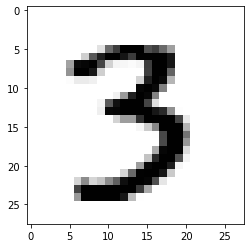

In [15]:
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()

In [16]:
print((index+1),'번째 이미지의 숫자는 바로', y_train[index],'입니다.')

10001 번째 이미지의 숫자는 바로 3 입니다.


In [17]:
print(x_train.shape)     #학습용 데이터는 28x28크기의 숫자 이미지가 60,000장 있음.

(60000, 28, 28)


In [18]:
print(x_test.shape)      #시험용 데이터는 28x28크기의 숫자 이미지가 10,000장 있음.

(10000, 28, 28)


__3) 데이터 전처리 하기__

In [19]:
print('최소값:',np.min(x_train),'최대값',np.max(x_train))    #숫자 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 가짐.

최소값: 0 최대값 255


In [20]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), '최대값:',np.max(x_train_norm))

#인공지능 모델 훈련시킬 땐, 일반적으로 0~1 사이의 갑으로 정규화 시키는 것이 좋음.
#MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255로 나누어줌.
#최소값이 0, 최대값이 1에 근접하도록 나오는지 확인!

최소값: 0.0 최대값: 1.0


---

**1-3. 딥러닝 네트워크 설계하기**

**1) Sequenential Model을 사용해 보자**

- tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예입니다.   
- 모델을 만드는 과정!!  

In [21]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
# Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수
# 16 의미: 얼마나 다양한 이미지의 특징을 살펴볼 것인가?              // input_shape: 입력 이미지의 형태
# (입력 이미지가 다양할수록 더 많은 특징을 고려)

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
# Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수
# 32 의미: 얼마나 다양한 이미지의 특징을 살펴볼 것인가?              
# (입력 이미지가 다양할수록 더 많은 특징을 고려)

model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
# Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자
# 분류기 알고리즘을 얼마나 복잡하게 할 것인가?
# (복잡한 문제일수록 이 수를 늘려보자.)
# 숫자인 경우 10개, 알파벳을 구분한다면 대문자 26, 소문자 26, 총 52개

model.add(keras.layers.Dense(10, activation='softmax'))
# Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지장
# (최종 분류기의 class 수)
# 여기서는 0~0까지 총 10개의 class를 구분하므로 10


print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [22]:
model.summary() # 만든 딥러닝 네트워크 모델을 확인 => moel.summary() 메소드

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

---

**1-4. 딥러닝 네트워크 학습시키기**

- 네트워크 입력(데이터 개수, 이미지 크기x, 이미지 크기y, 채널 수)
- input_shape=(28,28,1)
- print(x_train.shape)하면 => (60000, 28, 28)로 채널 수에 대한 정보 없음.
- 따라서 (60000, 28, 28, 1)로 만들어 줘야함! // 1: 흑백, 3: 칼라

In [23]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터 개수에 -1을 쓰면 reshape시 자동계산됩니다. 
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [24]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

# x_train 학습 데이터로 딥러닝 네트워크 학습
# epochs=10은 전체 60000개의 데이터를 10번 반복사용해서 학습

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2110 - accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0680 - accuracy: 0.9791
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0397 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0270 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0182 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0167 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.012

- x_train 학습 데이터로 딥러닝 네트워크 학습
- epochs=10은 전체 60000개의 데이터를 10번 반복사용해서 학습
- 학습이 진행됨에 따라 epoch 별로 정확도(accuracy)가 올라가는지 확인 가능
- 인식 정확도가 0.9459에서 0.9952까지 오름

---

**1-5. 테스트 데이터로 성능을 확인해 보자**

**1) 테스트 데이터로 성능을 확인해 보자**

- 위의 인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것
- 즉, 연습문제를 잘 푸는 인공지능을 만든 것임.
- 우리가 만든 딥러닝 네트워크는 실제로도 잘 볼 수 있을 지 시험용 데이터(x_test)로 확인

In [25]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 0s - loss: 0.0387 - accuracy: 0.9890
test_loss: 0.03870084881782532 
test_accuracy: 0.9890000224113464


- 결과가 0.9965(테스트)에서 0.9903로 떨어짐
- 위 MNIST 데이터셋 참고문헌을 보면 학습용과 시험용 데이터의 손글씨 주인이 다른 것을 확인 가능
- 한 번도 본적이 없는 필체의 손글씨가 섞여 있을 가능성이 높음
- 즉, 인식률이 떨어지는 것은 당연.

**2) 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자**

- model.evalute() 대신 model.predict()을 사용하면 
- model이 입력값을 보고 실체로 추론한 확률분포 값을 출력
- 우리가 만든 10개 중 어느 것일지에 대한 확률값을 출력하는 함수임.
- 이 함수의 출력값(확률값이 가장 높은 숫자)이 model이 추론한 숫자.

In [26]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.0216810e-09 9.2564359e-11 1.1735485e-08 1.1895921e-08 3.6100222e-12
 4.0933368e-12 4.2479232e-15 1.0000000e+00 5.5680243e-09 1.4456789e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


- model.predict()의 결과가 벡터의 형태로 나옴.
- 이 벡터는 model이 추론한 결과가 각 0,1, ... ,9일 확률을 의미.
- model이 추론한 결과 7이 확률이 1.00 근접.
- model은 입력한 이미지가 숫자 7을 확신하고 있음.

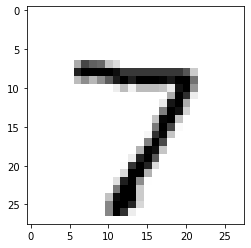

In [27]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

- model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우, 직접 확인 가능

예측확률분포: [1.5582980e-06 2.7578419e-01 2.4403180e-01 6.1650346e-03 1.1696022e-05
 3.7529862e-08 3.4620719e-08 4.7374722e-01 2.4920702e-04 9.2468445e-06]
라벨: 2, 예측결과: 7


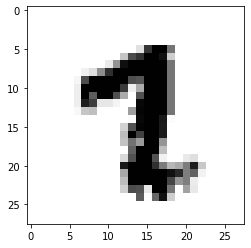

예측확률분포: [1.9993813e-06 8.1067575e-10 7.4079338e-07 9.5539108e-02 4.9599253e-12
 4.1758147e-05 1.9211932e-08 8.8657373e-11 9.0441626e-01 1.0587342e-07]
라벨: 3, 예측결과: 8


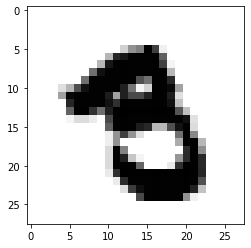

예측확률분포: [1.9030566e-09 1.0684220e-06 1.2746279e-10 2.2491242e-06 4.9238223e-01
 1.5249192e-06 5.0062514e-09 7.2095667e-05 2.7073853e-05 5.0751382e-01]
라벨: 4, 예측결과: 9


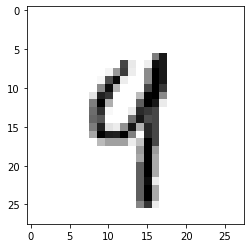

예측확률분포: [2.51786165e-08 5.07774644e-07 6.17743012e-08 4.10601884e-01
 1.15392817e-04 3.85945559e-01 1.12968706e-07 1.77083268e-06
 1.27846032e-01 7.54885897e-02]
라벨: 9, 예측결과: 3


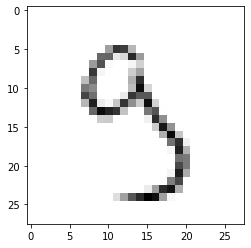

예측확률분포: [7.2657144e-06 4.3725860e-05 9.6108863e-08 5.7245567e-12 5.5648041e-01
 3.2672912e-07 4.4346774e-01 3.8678110e-08 2.3467437e-07 4.6261930e-10]
라벨: 6, 예측결과: 4


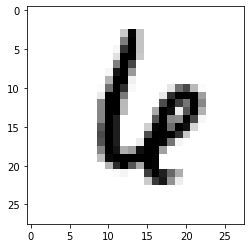

In [28]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

- 틀린 경우를 보면 model도 추론 결과에 대한 확신이 매우 낮고 혼란스러움.
- model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 됨
- 아이디어를 얻을 수 있는 방법 중 하나

---

**1-6. 더 좋은 네트워크 만들어 보기**

- 하이퍼파라미터들을 바꾸어 인식률을 높일 수 있음.
- Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄임.
- Dense 레이어에서 뉴런수를 바꾸어 보거나, 학습 반복 획수(epoch)를 변경.

In [29]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [30]:
#바꿔 볼 수 있는 하이퍼파라미터들 (실습 / 수치 바꿔보기)
n_channel_1=32     # 16 -> 32
n_channel_2=64     # 32 -> 64
n_dense=64         # 32 -> 64
n_train_epoch=20   # 10 -> 20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

- loss: 라벨에서 예측값을 빼고 어떠한 연산값이 나온 것
- loss가 적을 수록 예측과 비슷하다
- loss를 줄이는 것이 목표.

---

**1-7. 프로젝트: 가위바위보 분류기 만들기**

**1) 데이터 준비, 만들기**

***리눅스 터미널** 

- mkdir -p ~/aiffel/rock_scissor_paper/scissor
- mkdir -p ~/aiffel/rock_scissor_paper/rock
- mkdir -p ~/aiffel/rock_scissor_paper/paper
- ls -l ~/aiffel/rock_scissor_paper


- mkdir -p : mkdir를 사용하여 하위 디렉토리를 생성할때   
    차례대로 만들지 않고 중간 디렉토리 없이 바로 그 다음   
    하위 디렉토리를 만들게되면 "디렉토리를 생성할 수 없습니다."   
    라는 메시지가 나오는데, -p 옵션을 주어 생성하게 되면   
    자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 
    생성하게 됩니다.  



In [31]:
from PIL import Image

pil_image = Image.open('aiffel/rock_scissor_paper/paper/80.jpg')

img = np.array(pil_image)
img.shape

# paper 디렉터리에 있는 파일 '80.jpg'의 크기를 알아봄.

(28, 28, 3)

**2) 데이터 불러오기 + Resize 하기**

- 224x224 => 28x28 로 이미지 크기 바꾸기
- PIL 라이브러리 사용 예정

In [32]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [33]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [34]:
import os
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [35]:
import os
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


In [36]:
import glob

- load_data(): 입력으로 이미지가 있는 폴더 위치를 받음.
- 여기서 rock_scissor_papper 폴더 위치를 적어줌.
- 숫자 손글씨는 0~9까지 클라스가 있었으니 
- 가위바뷔보는 3개의 클래스 => 가위:0, 바위:1, 보:2 로 라벨링

In [37]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1789   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1789 입니다.
x_train shape: (1789, 28, 28, 3)
y_train shape: (1789,)


라벨:  0


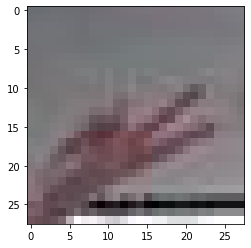

In [38]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

**3) 딥러닝 네트워크 설계하기**

- 실전 연습

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))

model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.5))                      # 몇개의 뉴련을 인위적으로 줄여주고 과도한 학습을 막아줌!
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(20, activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

**4) 딥러닝 네트워크 학습시키기**

In [40]:
# Hint! model.compile()과 model.fit()을 사용

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
56/56 [==============================] - 0s 5ms/step - loss: 5.5704 - accuracy: 0.3605
Epoch 2/10
56/56 [==============================] - 0s 4ms/step - loss: 1.1209 - accuracy: 0.4287
Epoch 3/10
56/56 [==============================] - 0s 4ms/step - loss: 0.9821 - accuracy: 0.5467
Epoch 4/10
56/56 [==============================] - 0s 5ms/step - loss: 0.9451 - accuracy: 0.5830
Epoch 5/10
56/56 [==============================] - 0s 4ms/step - loss: 0.8657 - accuracy: 0.6048
Epoch 6/10
56/56 [==============================] - 0s 5ms/step - loss: 0.8364 - accuracy: 0.6378
Epoch 7/10
56/56 [==============================] - 0s 4ms/step - loss: 0.8518 - accuracy: 0.6288
Epoch 8/10
56/56 [==============================] - 0s 4ms/step - loss: 0.8303 - accuracy: 0.6417
Epoch 9/10
56/56 [==============================] - 0s 4ms/step - loss: 0.7317 - accuracy: 0.6914
Epoch 10/10
56/56 [==============================] - 0s 4ms/step - loss: 0.8057 - accuracy: 0.6451


**5) 얼마나 잘 만들었는지 확인하기(테스트)**

**<데이터 합치기 코드>**

In [41]:
import os
from glob import glob
import shutil
from tqdm.notebook import tqdm

In [42]:
os.listdir('aiffel/rock_scissor_paper/')

['paper', 'scissor', 'rock']

**저장시킬 경로**

In [43]:
target_sci_path = 'aiffel/rock_scissor_paper/scissor/'
target_rock_path = 'aiffel/rock_scissor_paper/rock/'
target_papaer_path = 'aiffel/rock_scissor_paper/paper/'

In [44]:
start_idx = len(glob('aiffel/rock_scissor_paper/scissor/*.jpg'))
start_idx

552

**옮겨야 할 파일들의 경로**

In [45]:
Lee_papers = glob('aiffel/rock_scissor_paper_Lee/paper/*.jpg')
Lee_scissors = glob('aiffel/rock_scissor_paper_Lee/scissor/*.jpg')
Lee_rock = glob('aiffel/rock_scissor_paper_Lee/rock/*.jpg')
Jung_papers = glob('aiffel/rock_scissor_paper_Jung/paper/*jpg')
Jung_scissors = glob('aiffel/rock_scissor_paper_Jung/scissor/*jpg')
Jung_rock = glob('aiffel/rock_scissor_paper_Jung/rock/*jpg')
Kim_papers = glob('aiffel/rock_scissor_paper_Kim/paper/*.jpg')
Kim_scissors = glob('aiffel/rock_scissor_paper_Kim/scissor/*.jpg')
Kim_rock =glob('aiffel/rock_scissor_paper_Kim/rock/*.jpg')

**Lee data**

In [46]:
start_idx = len(glob('aiffel/rock_scissor_paper/paper/*.jpg'))
for i in tqdm(range(len(Lee_papers))) :                         # tqdm 은 진행도를 확인하기 위해서 사용
    file_name = str(i+start_idx) + ".jpg"
    shutil.move(Lee_papers[i], target_papaer_path+file_name)    # shutil.move 를 사용해서 target_path의 경로로 파일을 rename하면서 이동시킨다

In [47]:
start_idx = len(glob('aiffel/rock_scissor_paper/scissor/*.jpg'))
for i in tqdm(range(len(Lee_scissors))) :
    file_name = str(i+start_idx) + ".jpg"
    shutil.move(Lee_scissors[i], target_sci_path+file_name)

In [48]:
start_idx = len(glob('aiffel/rock_scissor_paper/rock/*.jpg'))
for i in tqdm(range(len(Lee_rock))) :
    file_name = str(i+start_idx) + ".jpg"
    shutil.move(Lee_rock[i], target_rock_path+file_name)

**Kim data**

In [49]:
start_idx = len(glob('aiffel/rock_scissor_paper/paper/*.jpg'))
for i in tqdm(range(len(Kim_papers))) :
    file_name = str(i+start_idx) + ".jpg"
    shutil.move(Kim_papers[i], target_papaer_path+file_name)

In [50]:
start_idx = len(glob('aiffel/rock_scissor_paper/scissor/*.jpg'))
for i in tqdm(range(len(Kim_scissors))) :
    file_name = str(i+start_idx) + ".jpg"
    shutil.move(Kim_scissors[i], target_sci_path+file_name)

In [51]:
start_idx = len(glob('aiffel/rock_scissor_paper/rock/*.jpg'))
for i in tqdm(range(len(Kim_rock))) :
    file_name = str(i+start_idx) + ".jpg"
    shutil.move(Kim_rock[i], target_rock_path+file_name)

**Jung data**

In [52]:
start_idx = len(glob('aiffel/rock_scissor_paper/paper/*.jpg'))
for i in tqdm(range(len(Jung_papers))) :
    file_name = str(i+start_idx) + ".jpg"
    shutil.move(Jung_papers[i], target_papaer_path+file_name)

In [53]:
start_idx = len(glob('aiffel/rock_scissor_paper/scissor/*.jpg'))
for i in tqdm(range(len(Jung_scissors))) :
    file_name = str(i+start_idx) + ".jpg"
    shutil.move(Jung_scissors[i], target_sci_path+file_name)

In [54]:
start_idx = len(glob('aiffel/rock_scissor_paper/rock/*.jpg'))
for i in tqdm(range(len(Jung_rock))) :
    file_name = str(i+start_idx) + ".jpg"
    shutil.move(Jung_rock[i], target_rock_path+file_name)

**파일을 이동시킨 후 각 경로의 파일 개수 확인**

In [55]:
paper_len = len(glob('aiffel/rock_scissor_paper/paper/*.jpg'))
sci_len = len(glob('aiffel/rock_scissor_paper/scissor/*.jpg'))
rock_len = len(glob('aiffel/rock_scissor_paper/rock/*.jpg'))

print(paper_len, sci_len, rock_len, paper_len+sci_len+rock_len)

638 552 599 1789


**x, y train data를 80%, test data를 20% 분할**

In [56]:
from sklearn.model_selection import train_test_split


train_set, x_test = train_test_split(x_train, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(x_test), "test")

1431 train + 358 test


In [57]:
from sklearn.model_selection import train_test_split


train_set1, y_test = train_test_split(y_train, test_size=0.2, random_state=42)
print(len(train_set1), "train +", len(y_test), "test")


1431 train + 358 test


# 학습시킨 모델을 테스트 진행

**<Deep learning Model 설계>**

In [58]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))

model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.5))                      # 몇개의 뉴련을 인위적으로 줄여주고 과도한 학습을 막아줌!
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(20, activation='softmax'))


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

**<Deep learning Model 학습>**

In [59]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_test, y_test, epochs=20)

Epoch 1/20
12/12 [==============================] - 0s 4ms/step - loss: 26.1549 - accuracy: 0.2598
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 3.1808 - accuracy: 0.3855
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 1.4237 - accuracy: 0.4274
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 1.3412 - accuracy: 0.4246
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 1.1356 - accuracy: 0.4832
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.9880 - accuracy: 0.5419
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 1.0520 - accuracy: 0.5363
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 0.9158 - accuracy: 0.5726
Epoch 9/20
12/12 [==============================] - 0s 4ms/step - loss: 0.9445 - accuracy: 0.5642
Epoch 10/20
12/12 [==============================] - 0s 4ms/step - loss: 0.9321 - accuracy: 0.5559
Epoch 11/20
12/12 

**<Deep learning Model 평가>**

In [60]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

12/12 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7849
## evaluation loss and_metrics ##
[0.5537038445472717, 0.7849162220954895]


Epoch 1/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.7917 - accuracy: 0.6564
Epoch 2/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.7972 - accuracy: 0.6564
Epoch 3/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.8269 - accuracy: 0.6480
Epoch 4/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.9528 - accuracy: 0.5978
Epoch 5/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.7687 - accuracy: 0.6369
Epoch 6/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.7436 - accuracy: 0.6564
Epoch 7/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.7263
Epoch 8/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.8409 - accuracy: 0.6173
Epoch 9/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7626
Epoch 10/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.7095

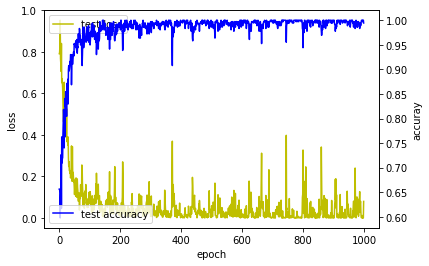

In [62]:
hist = model.fit(x_test, y_test, epochs=1000, batch_size=10)

print(hist.history['loss'])
print(hist.history['accuracy'])


fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='test accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## 미니 프로젝트 정리

**<진행 과정>**  
1. 테스트 데이터를 만들기 위해 4명의 조원들의 데이터를 합침
2. 합친 데이터를 8:2 비율로 train, test data로 나눔
3. test data를 통한 평가 모델 결과   
**=> loss: 0.5537, accuracy: 0.7849**
4. Loss & Accuracy 그래프 시각화

**<결과 평가>**
1. train data로 학습 시킨 결과 Overfitting이 발생함
2. Overfitting을 막기 위해 Dropout을 활용하여 Overfitting을 방지함
3. loss, accuracy 그래프가 이상적으로 잘 나옴

**<고찰>**
1. Validation data를 활용하여 최적의 모델을 찾는 과정이 없어서 아쉬웠음.
2. 데이터의 개수가 적었던 것이 아쉬웠음.
2. 수강생들의 모든 데이터로 진행하지 못한 점이 아쉬웠음.